In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
import folium

#### Look up

In [2]:
dataset = pd.read_csv("C:/Users/marti/Desktop/python_work/CSVs/Crime_Data_2010_2017.csv")

In [3]:
dataset

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,172116482,09/07/2017,09/07/2017,1005,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,23800 CALVERT ST,NaN,"(34.1883, -118.6536)"
1584312,172116489,09/07/2017,09/07/2017,1200,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN,"(34.1905, -118.6059)"
1584313,172116491,08/30/2017,07/15/2017,1,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN,"(34.201, -118.5885)"
1584314,172116498,09/08/2017,09/08/2017,1845,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE,"(34.2029, -118.6003)"


                                                    Crime Code Description
BATTERY - SIMPLE ASSAULT                                            145767
VEHICLE - STOLEN                                                    121329
BURGLARY FROM VEHICLE                                               121318
BURGLARY                                                            114751
THEFT PLAIN - PETTY ($950 & UNDER)                                  113709
THEFT OF IDENTITY                                                   100653
INTIMATE PARTNER - SIMPLE ASSAULT                                    85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...                   79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                             71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                       67631


<AxesSubplot:xlabel='Crime Code Description'>

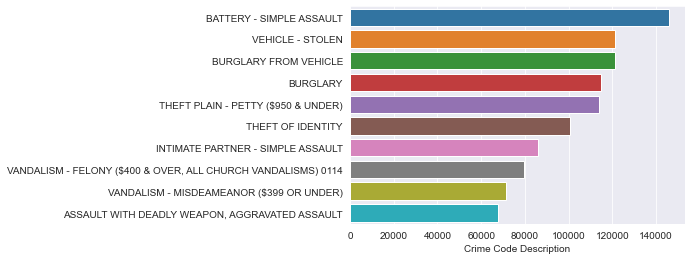

In [4]:
# Find data
ccd = dataset["Crime Code Description"].value_counts()
ccd = pd.DataFrame(ccd.head(10))
print(ccd)

# Plot
sns.set_style("darkgrid")
sns.barplot(x=ccd["Crime Code Description"].head(10) ,y=ccd.index ,ci=None ,orient = 'h', data=ccd)

             Area Name
77th Street     110605
Southwest       102259
N Hollywood      86405
Pacific          83763
Southeast        83517
Mission          80249
Northeast        76627
Van Nuys         75456
Newton           74385
Devonshire       74013


<AxesSubplot:xlabel='Area Name'>

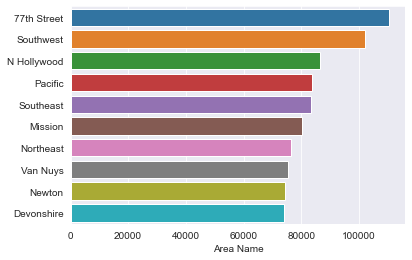

In [5]:
# Find data
an = dataset["Area Name"].value_counts()
an = pd.DataFrame(an.head(10))
print(an) 

# Plot
sns.set_style("darkgrid")
sns.barplot(x = an["Area Name"], y = an.index, ci = None ,orient = 'h', data = an)

      Time Occurred
1200          88426
1800          47046
2000          43991
1900          41995
2200          41488
1700          41479
2100          40407
800           39100
1500          37265
1600          37039


<AxesSubplot:xlabel='Time Occurred'>

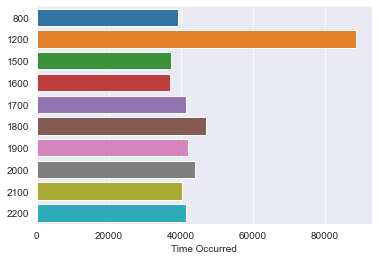

In [6]:
# Find data
to = dataset["Time Occurred"].value_counts()
to = pd.DataFrame(to.head(10))
print(to)

# Plot
sns.set_style("darkgrid")
sns.barplot(x = to["Time Occurred"], y = to.index, ci = None ,orient = 'h', data = to)

                                                Weapon Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)              319818
VERBAL THREAT                                                43814
UNKNOWN WEAPON/OTHER WEAPON                                  40746
HAND GUN                                                     25352
SEMI-AUTOMATIC PISTOL                                        10096
KNIFE WITH BLADE 6INCHES OR LESS                              9335
OTHER KNIFE                                                   6946
UNKNOWN FIREARM                                               6037
VEHICLE                                                       5348
REVOLVER                                                      4567


<AxesSubplot:xlabel='Weapon Description'>

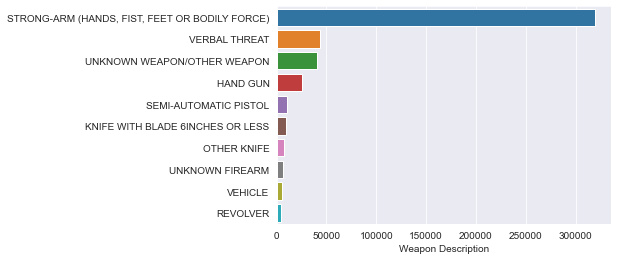

In [7]:
# Find data
wd = dataset["Weapon Description"].value_counts()
wd = pd.DataFrame(wd.head(10))
print(wd)

# Plot
sns.set_style("darkgrid")
sns.barplot(x = wd["Weapon Description"], y = wd.index, ci = None ,orient = 'h', data = wd)

Crime Area Plot

In [8]:
dataset["Location "]
# Column name has a space

0          (33.9829, -118.3338)
1          (34.0454, -118.3157)
2           (33.942, -118.2717)
3          (33.9572, -118.2717)
4          (34.2009, -118.6369)
                   ...         
1584311    (34.1883, -118.6536)
1584312    (34.1905, -118.6059)
1584313     (34.201, -118.5885)
1584314    (34.2029, -118.6003)
1584315    (34.2258, -118.5994)
Name: Location , Length: 1584316, dtype: object

In [9]:
# Rename column for easier dataset
dataset = dataset.rename(columns={'Location ': 'Location'})


In [52]:
listofcoord2 = dataset.Location
listofcoord2 = listofcoord2.tolist()

#listofcoord = dataset.Location.str.strip('()')
#listofcoord = listofcoord.tolist()
dataset["Location"] = dataset.Location.replace({"(":"["},{")":"]"})

AttributeError: 'Series' object has no attribute '_replace_columnwise'

In [54]:
# Split columns
datasetplot = dataset["Location"].str.split(',', n=1, expand = True)

# Rename columns to Latitude and Longitude
datasetplot["Latitude"] = datasetplot[0]
datasetplot["Longitude"] = datasetplot[1]

# Delete old columns
datasetplot.drop(columns = [0], inplace = True)
datasetplot.drop(columns = [1], inplace = True) 

datasetplot

,Latitude,Longitude
0,(33.9829,-118.3338)
1,(34.0454,-118.3157)
2,(33.942,-118.2717)
3,(33.9572,-118.2717)
4,(34.2009,-118.6369)
...,...,...
1584311,(34.1883,-118.6536)
1584312,(34.1905,-118.6059)
1584313,(34.201,-118.5885)
1584314,(34.2029,-118.6003)


In [61]:
Lat = datasetplot["Latitude"].tolist()
Lon = datasetplot["Longitude"].tolist()
print(np.concatenate((Lat.reshape(len(Lat),1),
                      Lon.reshape(len(Lon),1)),1))

AttributeError: 'list' object has no attribute 'reshape'

In [58]:
# Delete parenthesis
datasetplot.Latitude = datasetplot.Latitude.str.lstrip('(')
datasetplot.Longitude = datasetplot.Longitude.str.rstrip(')')

datasetplot

,Latitude,Longitude
0,33.9829,-118.3338
1,34.0454,-118.3157
2,33.942,-118.2717
3,33.9572,-118.2717
4,34.2009,-118.6369
...,...,...
1584311,34.1883,-118.6536
1584312,34.1905,-118.6059
1584313,34.201,-118.5885
1584314,34.2029,-118.6003


In [196]:
fixed_dataset = dataset.iloc[:,:-1]
datasetplot = datasetplot.join(fixed_dataset)
datasetplot

,Latitude,Longitude,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Weapon Used Code,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street
0,33.9829,-118.3338,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN
1,34.0454,-118.3157,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,...,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH
2,33.942,-118.2717,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,...,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN
3,33.9572,-118.2717,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,...,NaN,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL
4,34.2009,-118.6369,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,...,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,34.1883,-118.6536,172116482,09/07/2017,09/07/2017,1005,21,Topanga,2141,440,...,NaN,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,23800 CALVERT ST,NaN
1584312,34.1905,-118.6059,172116489,09/07/2017,09/07/2017,1200,21,Topanga,2156,330,...,NaN,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN
1584313,34.201,-118.5885,172116491,08/30/2017,07/15/2017,1,21,Topanga,2147,649,...,NaN,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN
1584314,34.2029,-118.6003,172116498,09/08/2017,09/08/2017,1845,21,Topanga,2136,946,...,NaN,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE


In [197]:
datasetplot=datasetplot.dropna(axis=0, subset=["Latitude"])
datasetplot=datasetplot[datasetplot["Latitude"] != 0]
datasetplot=datasetplot.dropna(axis=0, subset=["Longitude"])
datasetplot=datasetplot[datasetplot.Longitude != 0]

In [198]:
datasetplot["Latitude"].sort_values()

1574553          0
518234           0
518235           0
518236           0
518237           0
            ...   
39432      34.6828
554038     34.6828
202234      34.706
223489      34.706
765448     34.7907
Name: Latitude, Length: 1584307, dtype: object

In [199]:
datasetplot["Latitude"].sort_values(ascending = False)

765448     34.7907
202234      34.706
223489      34.706
39432      34.6828
554038     34.6828
            ...   
543083           0
1465923          0
670633           0
543084           0
1448757          0
Name: Latitude, Length: 1584307, dtype: object

In [200]:
datasetplot["Longitude"].sort_values()

517225      -117.6596
2507        -117.7059
238067        -117.71
219401      -117.7115
991814      -117.7119
              ...    
1425251             0
1425254             0
1425652             0
1475421             0
1519733             0
Name: Longitude, Length: 1584307, dtype: object

In [201]:
datasetplot["Longitude"].sort_values(ascending = False)

72351               0
1497333             0
1497356             0
1497378             0
1497398             0
              ...    
991814      -117.7119
219401      -117.7115
238067        -117.71
2507        -117.7059
517225      -117.6596
Name: Longitude, Length: 1584307, dtype: object

In [202]:
df_geo = gpd.GeoDataFrame(datasetplot, geometry = gpd.points_from_xy(datasetplot.Latitude, datasetplot.Longitude))

In [161]:
df_geo = df_geo.iloc[:,-1:]
df_geo

,geometry
0,POINT (33.983 -118.334)
1,POINT (34.045 -118.316)
2,POINT (33.942 -118.272)
3,POINT (33.957 -118.272)
4,POINT (34.201 -118.637)
...,...
1584311,POINT (34.188 -118.654)
1584312,POINT (34.191 -118.606)
1584313,POINT (34.201 -118.588)
1584314,POINT (34.203 -118.600)


<AxesSubplot:>

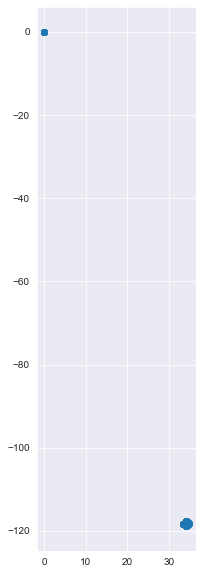

In [162]:
fig,ax = plt.subplots(figsize=(10,10))
df_geo.plot(ax=ax)

In [99]:
df_geo.plot(ax=ax)
m = folium.Map(location = [34.0522,-118.2437], zoom_start = 18)
m

<Figure size 432x288 with 0 Axes>

In [53]:
df_geo.explore()

NameError: name 'df_geo' is not defined

In [31]:
from folium import plugins

map = folium.Map(location = [34.0522,-118.2437], tiles = "Cartodb dark_matter", zoom_start = 18)

heat_data = [listofcoord]
             
#[[point.xy[1][0], point.xy[0][0]] for point in df_geo.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map

ValueError: Location should consist of two numerical values, but '33.9829, -118.3338' of type <class 'str'> is not convertible to float.

In [26]:
cities_data = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
axis = cities_data[cities_data.]

In [25]:
plt.figure(figsize=(14,9))
# Convert to str
datasetplot.Latitude = datasetplot.Latitude.astype(str)
datasetplot.Longitude = datasetplot.Longitude.astype(str)

# Plot data
# datasetplot.plot(kind="scatter", x = "Longitude", y = "Latitude")
fig = px.choropleth(datasetplot, lat = datasetplot.Latitude, lon = datasetplot.Longitude,
                    locations = "Area Name", locationmode = "USA-states" ,color = "Longitude")
fig.show()

ModuleNotFoundError: No module named 'plotly.validators.layout.template'

<Figure size 1008x648 with 0 Axes>